# A Workflow on the Titanic Data Set for Kaggle Competition

In this project, I will work with two data files from [Kaggle]("https://www.kaggle.com/c/titanic/data"), which is a competition. I have train and test data sets. The train data set is to train my model to predict the people who are survived. The test data set is to test my model on it. The train data set has the column which is information about the survival data. However, the test data set doesn't have any column about survival information. The [Kaggle]("https://www.kaggle.com/c/titanic/data") web page has more information about the columns. 
<br>
<br>
I will train my model and attach my prediction on Kaggle website to see my model's performance.
<br> 
In first step, I am going to start with exploring the data files. 

## Exploring the Data

In [1]:
import pandas as pd  # I will open the sets with Pandas.

train=pd.read_csv("train.csv")
holdout= pd.read_csv("test.csv")
test_shape = holdout.shape
test_shape

(418, 11)

In [2]:
train_shape= train.shape
train_shape

(891, 12)

The test data set has 418 entries and 11 columns. The train data set has 891 entries and 12 columns. The "Survived" column shows the passanger was survived or not. ( 0: " Not Survived ", 1: " Survived " )

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


I will check the situation of survival up to passanger's gender and their class. I will visualize it with Matplotlib library.

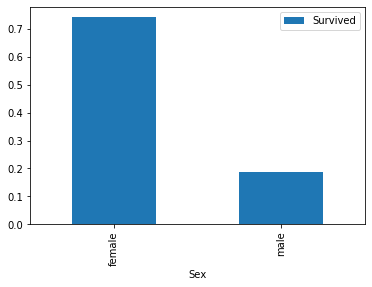

In [5]:
import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()


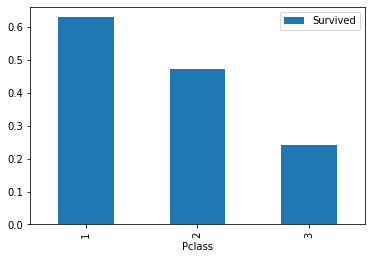

In [6]:
class_pivot= train. pivot_table(index= "Pclass", values= "Survived")
class_pivot.plot.bar()
plt.show()

I saw the situation of survival according to gender and class factors. These two factors are categorical. I will check the situation according to age factor. 

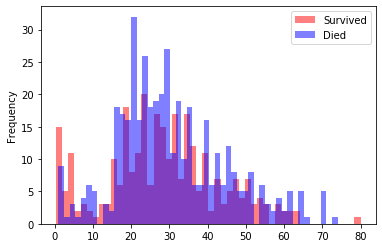

In [7]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

I need to categorize the age factor because it is difficult to use this information in my next predition model. I will create a function to categorize the age factor.

In [8]:
def process_age(df):
    '''
    Process the Age column into pre-defined 'bins'
    
    Usage
    ------
    
    train= process_age(train)
    '''
    
    df["Age"]= df["Age"].fillna(-0.5)
    cut_points= [-1,0,5,12,18,35,60,100]
    label_names= ["Missing", "Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]
    df["Age_categories"]= pd.cut(df["Age"], cut_points, labels=label_names)
    return df

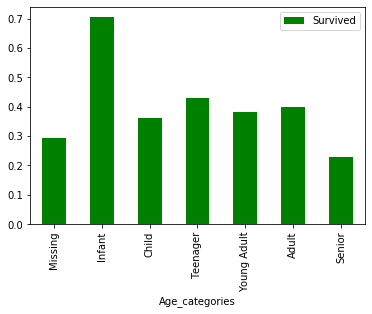

In [9]:
# I will check the situation of survival according to age factor.
train= process_age(train)
pivot= train. pivot_table( index= "Age_categories", values= "Survived")
pivot.plot.bar( color= "Green")
plt.show()

In [10]:
# I will use same function for the test data file

holdout= process_age(holdout)

Machine learning algorithms can not understand texts, so I need numbers to use them on my prediction models. I will create a function to convert the "Age", "Class" and "Gender" factors to numeric values.

In [11]:
def create_dummies(df, column_name):
    '''
    Create Dummy Columns (One Hot Encoding) from a single Column
    
    Usage
    ------
    
    train= create_dummies(train, "Age")
    '''
    dummies= pd.get_dummies(df[column_name], prefix= column_name)
    df= pd.concat([df, dummies], axis=1)
    return df

In [12]:
# I will use my function on these columns.

train = create_dummies(train,"Pclass")
holdout = create_dummies(holdout,"Pclass")
train= create_dummies(train, "Sex")
holdout= create_dummies(holdout, "Sex")
train= create_dummies(train, "Age_categories")
holdout= create_dummies(holdout, "Age_categories")

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 891 non-null    int64   
 1   Survived                    891 non-null    int64   
 2   Pclass                      891 non-null    int64   
 3   Name                        891 non-null    object  
 4   Sex                         891 non-null    object  
 5   Age                         891 non-null    float64 
 6   SibSp                       891 non-null    int64   
 7   Parch                       891 non-null    int64   
 8   Ticket                      891 non-null    object  
 9   Fare                        891 non-null    float64 
 10  Cabin                       204 non-null    object  
 11  Embarked                    889 non-null    object  
 12  Age_categories              891 non-null    category
 13  Pclass_1            

In [15]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 418 non-null    int64   
 1   Pclass                      418 non-null    int64   
 2   Name                        418 non-null    object  
 3   Sex                         418 non-null    object  
 4   Age                         418 non-null    float64 
 5   SibSp                       418 non-null    int64   
 6   Parch                       418 non-null    int64   
 7   Ticket                      418 non-null    object  
 8   Fare                        417 non-null    float64 
 9   Cabin                       91 non-null     object  
 10  Embarked                    418 non-null    object  
 11  Age_categories              418 non-null    category
 12  Pclass_1                    418 non-null    uint8   
 13  Pclass_2            

## First Prediction and Submission

I have explored my data and made some changes on the data until now. I want to make a prediction on the prepared data and see the performance. According to the success, I will maintain my implementation. I will use Logistic Regression method to make my first prediction. After that, I have to calculate the accuracy to be sure about my prediction's performance before the submission to the Kaggle. I have the "holdout" data set, but this data set does not have survival information. I will create new test data by splitting the train data.   

In [16]:
from sklearn.linear_model import LogisticRegression


In [17]:
from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X= train[columns]
all_y= train["Survived"]

train_X, test_X, train_y, test_y= train_test_split(all_X, all_y, test_size= 0.20, random_state=0)


In [18]:
from sklearn.metrics import accuracy_score
lr= LogisticRegression()
lr.fit(train_X, train_y)
predictions= lr.predict(test_X)
accuracy= accuracy_score(test_y, predictions)
print(accuracy)

0.8100558659217877


Now, my accuracy %81. I will use cross validation method to be sure on this prediction's performance.

In [19]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores= cross_val_score(lr, all_X, all_y, cv=10)
accuracy= np.mean(scores)
print(scores)
print(accuracy)


[0.8        0.82022472 0.76404494 0.87640449 0.80898876 0.78651685
 0.76404494 0.76404494 0.83146067 0.80898876]
0.8024719101123596


With the cross validation method the accuracy range changes between %76 and %87. I will make prediction on the holdout data set and I will make my first submission on the Kaggle.

In [20]:
lr= LogisticRegression()
lr.fit(all_X, all_y)
holdout_predictions= lr.predict(holdout[columns])

To make submission on the Kaggle, I need to create a csv file. I will save my prediction as a csv file.

In [21]:
predictions= holdout_predictions
holdout_ids= holdout["PassengerId"]
submission_df= {"PassengerId": holdout_ids,
                "Survived": predictions}
submission= pd.DataFrame(submission_df)
submission.to_csv("firstsubmission.csv", index=False)

![title](firstsubmission.png)

I submitted my first prediction file on the Kaggle competition page. In this first submission, my accuracy is approximately %76. It is good start for the first trial without feature engineering, but it is not enough. I need to implement my features and prediction model.

## Feature Engineering to Improve Prediction

I have two way to boost my accurcy. One of them is improving the features. The other one is improving the prediction model. In this step, I will focus on features. 

In [22]:
def process_missing(df):
    '''
    Handle various missing values from the data set
    
    Usage
    ------
    holdout= process_missing(holdout)
    '''
    
    df["Fare"]= df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"]= df["Embarked"].fillna("S")
    return df


In [23]:
def process_fare(df):
    '''
    Process the Fare column into pre-defined 'bins'
    
    Usage
    ------
    
    train=process_fare(train)
    '''
    cut_points= [-1,12,50,100,1000]
    label_names= ["0-12", "12-50", "50-100", "100+"]
    df["Fare_categories"]= pd.cut(df["Fare"], cut_points, labels=label_names)
    return df

In [24]:
def process_cabin(df):
    '''
    Process the Cabin column into pre-defined 'bins'
    
    Usage
    ------
    
    train= process_cabin(train)
    '''
    
    df["Cabin_type"]= df["Cabin"].str[0]
    df["Cabin_type"]= df["Cabin_type"].fillna("Unknown")
    df= df.drop("Cabin", axis=1)
    return df

In [25]:
def process_titles(df):
    '''
    Extract and categorize the title from the name column
    
    Usage
    ------
    
    train= process_titles(train)
    '''
    titles={
        "Mr": "Mr",
        "Mme": "Mrs",
        "Ms": "Mrs",
        "Mrs": "Mrs",
        "Master": "Master",
        "Mlle": "Miss",
        "Miss": "Miss",
        "Capt": "Officer",
        "Col": "Officer",
        "Major": "Officer",
        "Dr": "Officer",
        "Rev": "Officer",
        "Jonkheer": "Royalty",
        "Don": "Royalty",
        "Sir": "Royalty",
        "Countess": "Royalty",
        "Dona": "Royalty",
        "Lady": "Royalty"
    }
    extracted_titles= df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
    df["Title"]= extracted_titles.map(titles)
    return df

In [26]:
def pre_process(df):
    df= process_missing(df)
    df= process_age(df)
    df= process_fare(df)
    df= process_titles(df)
    df= process_cabin(df)
    
    for col in ["Age_categories", "Fare_categories", "Title", "Cabin_type", "Sex"]:
        df= create_dummies(df,col)
    return df

train= pre_process(train)
holdout= pre_process(holdout)

In [27]:
explore_cols= ["SibSp", "Parch", "Survived"]
explore= train[explore_cols].copy()
explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   SibSp     891 non-null    int64
 1   Parch     891 non-null    int64
 2   Survived  891 non-null    int64
dtypes: int64(3)
memory usage: 21.0 KB


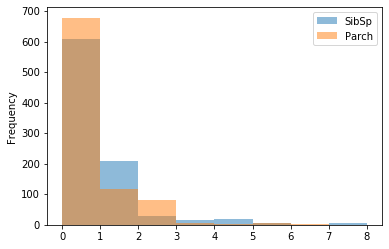

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
explore.drop("Survived", axis=1).plot.hist(alpha=0.5, bins=8)
plt.show()

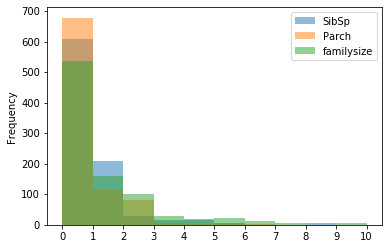

In [29]:
explore["familysize"]= explore[["SibSp", "Parch"]].sum(axis=1)
explore.drop("Survived", axis=1).plot.hist(alpha=0.5, bins=10)
plt.xticks(range(11))
plt.show()

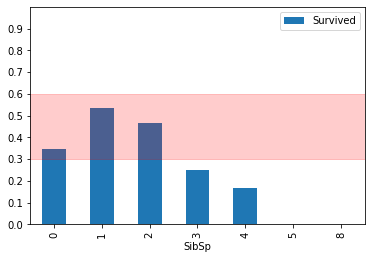

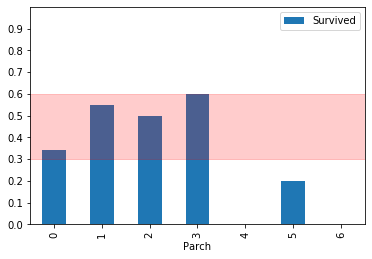

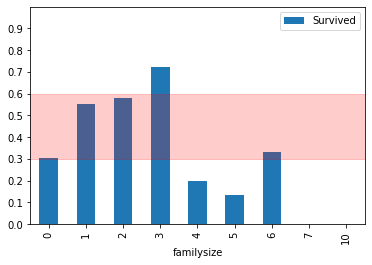

In [30]:
import numpy as np

for col in explore.columns.drop("Survived"):
    pivot= explore.pivot_table(index=col, values="Survived")
    pivot.plot.bar(ylim=(0,1), yticks=np.arange(0,1,.1))
    plt.axhspan(.3, .6, alpha=0.2, color="red")
    plt.show()

In [31]:
def process_isalone(df):
    df["familysize"]= df[["SibSp","Parch"]].sum(axis=1)
    df["isalone"]=0
    df.loc[(df["familysize"]==0), "isalone"]=1
    df=df.drop("familysize", axis=1)
    return df

train= process_isalone(train)
holdout= process_isalone(holdout)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

def select_features(df):
    
    df= df.select_dtypes([np.number]).dropna(axis=1)
    all_X= df.drop(["Survived", "PassengerId"], axis=1)
    all_y= df["Survived"]
    
    clf= RandomForestClassifier(random_state=1)
    selector= RFECV(clf, cv=10)
    selector.fit(all_X, all_y)
    
    best_columns= list(all_X.columns[selector.support_])
    print("Best Columns \n"+ "_"*12+ "\n{}\n".format(best_columns))
    
    return best_columns

cols= select_features(train)

Best Columns 
____________
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Young Adult', 'Age_categories_Adult', 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Teenager', 'Age_categories_Young Adult', 'Age_categories_Adult', 'Fare_categories_0-12', 'Fare_categories_12-50', 'Fare_categories_50-100', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male', 'isalone']



In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def select_model(df, features):
    all_X= df[features]
    all_y= df["Survived"]
    
    models= [{
        "name": "LogisticRegression",
        "estimator": LogisticRegression(),
        "hyperparameters": { "solver": ["newton-cg", "lbfgs", "liblinear"]}
        
    },
    {
        "name": "KNeighborsClassifier",
        "estimator": KNeighborsClassifier(),
        "hyperparameters": { "n_neighbors": range(1,20,2), "weights":["distance", "uniform"], 
                           "algorithm": ["ball_tree", "kd_tree", "brute"], "p": [1,2]}
        
    },
    {
        "name": "RandomForestClassifier",
        "estimator": RandomForestClassifier(random_state=1),
        "hyperparameters": { "n_estimators": [4,6,9],
                           "criterion":["entropy", "gini"],
                            "max_depth": [2,5,10],
                            "max_features": ["log2", "sqrt"],
                            "min_samples_leaf": [1,5,8],
                            "min_samples_split": [2,3,5]
                           }
        
        
    }]
    
    for model in models:
        print(model["name"])
        print("-"*len(model["name"]))
        
        grid= GridSearchCV( model["estimator"],
                          param_grid= model["hyperparameters"], cv=10)
        grid.fit(all_X, all_y)
        model["best_params"]= grid.best_params_
        model["best_score"]= grid.best_score_
        model["best_model"]= grid.best_estimator_
        
        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))
    return models

In [34]:
result= select_model(train, cols)

LogisticRegression
------------------


C:\Users\shyl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shyl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

Best Score: 0.82270911360799
Best Parameters: {'solver': 'lbfgs'}

KNeighborsClassifier
--------------------
Best Score: 0.7957802746566791
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

RandomForestClassifier
----------------------
Best Score: 0.8462297128589263
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}



In [35]:
def save_submission_file(model, cols, filename= "submission.csv"):
    holdout_data= holdout[cols]
    predictions= model.predict(holdout_data)
    
    holdout_ids= holdout["PassengerId"]
    submission_df= {"PassengerId": holdout_ids,
                   "Survived": predictions}
    submission= pd.DataFrame(submission_df)
    submission.to_csv(filename, index=False)
    

In [36]:
best_rf_model= result[2]["best_model"]
save_submission_file(best_rf_model, cols)